In [1]:
import requests
import urllib
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd


In [2]:
lst_url =[
    "https://finance.yahoo.com/most-active/", 
    "https://finance.yahoo.com/u/yahoo-finance/watchlists/most-active-penny-stocks"
    
    ]



In [3]:
lst_Merge = []


In [4]:

for link in range(len(lst_url)):
	headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:101.0) Gecko/20100101 Firefox/101.0', "cookie": "CONSENT=YES+cb.20230531-04-p0.en+FX+908"}

	response = requests.get(lst_url[link ], headers=headers )

	if response.status_code != 200:
		print("Error fetching page")
		exit()
	else:
		content = response.content
		
	soup = BeautifulSoup(response.content, 'html.parser')
	# All links in the page

	nb_links = len(soup.find_all('a'))
	print(f"There are {nb_links} links in this page")

	# GET ALL Text from the LINKS
	items = [item.text.strip() for item in soup.select('a') ]
	# for i in items:
	# 	print(i)

	#   REMOVE NON LINK TEXT
	test_list = [item.text.strip() for item in soup.select('a') ]
	# print(test_list)


	#  FILTER FOR CAPS ONLY
	for word in items:
		upperChars = True
		for letters in word:
	
			# checking for uppercase
			if not letters.isupper():
				upperChars = False
				break
		if upperChars:
			lst_Merge.append(word)
	

	# remove blanks
	lst_Merge = list(filter(None, lst_Merge))
	# print('Merged List: ' , lst_Merge)


There are 97 links in this page
There are 92 links in this page


In [5]:
#   NYSE ONLY FILTER
# Append END while not END to RES_LST

tkr = '' 

def txtStripper(dcf):
    dcf = dcf.replace('\n', '')
    dcf = dcf.strip()
    print((tkr), ':',  (dcf))

lst_Merge.append('END')

#	Remove duplicates
# set_Merge =  set(lst_Merge)
# print(set_Merge)

while tkr != 'END':
    try:
        for l in lst_Merge:
                    
                        tkr = l
                        baseUrl = 'https://site.financialmodelingprep.com/discounted-cash-flow-model/{}'
                        url = baseUrl.format(str(tkr))
                        response = urllib.request.urlopen(url)
                        url_contents = response.read()

                        soup = BeautifulSoup(url_contents, "html.parser")
                        dcf = soup.find("div", {"class": "global-button2"}).text

                        txtStripper(dcf)

    except AttributeError:
        print('No' , (tkr) )
        lst_Merge.remove(tkr)
        print('Ammended tkr: ' , lst_Merge)

print('Done')


TSLA : Stock DCF: -49.38 | 178.5 | overvalue
NIO : Stock DCF: - | 13.0601 | undervalue
BAC : Stock DCF: 122.34 | 32.54 | undervalue
AMZN : Stock DCF: 76.21 | 88.89 | overvalue
XPEV : Stock DCF: -5,611,186,772,807.37 | 11.66 | overvalue
AMD : Stock DCF: 26.53 | 70.89 | overvalue
TLRY : Stock DCF: -1,749.48 | 4.0113 | overvalue
SNAP : Stock DCF: -449.90 | 9.3885 | overvalue
CCL : Stock DCF: -32.53 | 9.185 | overvalue
AAPL : Stock DCF: 119.84 | 144.03 | overvalue
CS : Stock DCF: 1,276.01 | 3.2018 | undervalue
LCID : Stock DCF: -4,479,750.62 | 8.64 | overvalue
META : Stock DCF: 396.34 | 114.775 | undervalue
ITUB : Stock DCF: 156.23 | 4.895 | undervalue
VVNT : Stock DCF: - | 11.9 | undervalue
PLTR : Stock DCF: -12.93 | 7.015 | overvalue
SOFI : Stock DCF: -68.24 | 4.3331 | overvalue
F : Stock DCF: 27.83 | 13.095 | undervalue
T : Stock DCF: 182.05 | 19.005 | undervalue
NVDA : Stock DCF: 89.51 | 160.6 | overvalue
BILI : Stock DCF: -483.89 | 20.48 | overvalue
LU : Stock DCF: 32.47 | 2.055 | und

In [22]:
mergedTkrs = ''

overVal = []
underVal = []
nanList = []

dict_CurrentPrice = {}
dict_Valuation = {}
dict_Discount = {}

# tkr, $, evaluation
#lst_Comparison = []

In [23]:

# remove newline and spaces
def txtValueFilter(dcf):
    dcf = dcf.replace('\n', '')
    dcf = dcf.replace(',', '')
    dcf = dcf.strip()

    if dcf is None:
        lst_Merge.remove(mergedTkrs)

    if 'Stock DCF: - | ' in dcf: # NAN values in ticker price. instead of try: block
        nanList.append(mergedTkrs)

    elif 'overvalue' in dcf:
        overVal.append(mergedTkrs) # append to list
        
        
    elif 'undervalue' in dcf:
         underVal.append(mergedTkrs) # append to list
         
         EvaluateDCF(dcf)
               
    else:
        print('No Value Statement: code Throw')

    print(mergedTkrs, ':',  (dcf))



In [28]:
# CALCULATE VALUE DIFFERENCE

def EvaluateDCF(tstStr):
    tstStr = tstStr.replace('Stock DCF:', '')
    tstStr = tstStr.replace('|', '-', 1)
    tstStr = tstStr.replace('|', '')
    tstStr = tstStr.replace('overvalue', '')
    tstStr = tstStr.replace('undervalue', '')
    
    tstStr = tstStr.split('-')

    eval = float(tstStr[0]) - float(tstStr[1])
    eval = (round(eval, 2))

    currentPrice =  float(tstStr[0])
    valuation = float(tstStr[1])
    discount = currentPrice - valuation

    dict_CurrentPrice.update( {mergedTkrs : tstStr[0]})
    dict_Valuation.update({mergedTkrs : discount})
    dict_Discount.update({mergedTkrs : valuation})

    #lst_Comparison.append(mergedTkrs, currentPrice, eval )
    
    print (mergedTkrs, 'Undervalued by: $', valuation)


In [29]:
# set_Merge

In [30]:
# lst_Merge = set_Merge

In [31]:
#   CALC LOOP

for mergedTkrs in lst_Merge:
    try:
        baseUrl = 'https://site.financialmodelingprep.com/discounted-cash-flow-model/{}'
        url = baseUrl.format(str(mergedTkrs))
        response = urllib.request.urlopen(url)
        url_contents = response.read()

        soup = BeautifulSoup(url_contents, "html.parser")
        dcf = soup.find("div", {"class": "global-button2"}).text

        print('error checker: ',mergedTkrs, dcf)

        txtValueFilter(dcf) 
    
    except AttributeError:
        print('No text for ' , (mergedTkrs) )
        lst_Merge.remove(mergedTkrs)

    except KeyError: 'END'

print('CALC DONE. ')



error checker:  TSLA 
                Stock DCF: -49.38 | 178.18 | overvalue
            
TSLA : Stock DCF: -49.38 | 178.18 | overvalue
error checker:  NIO 
                Stock DCF: - | 13.0583 | undervalue
            
NIO : Stock DCF: - | 13.0583 | undervalue
error checker:  BAC 
                Stock DCF: 122.34 | 32.545 | undervalue
            
BAC Undervalued by: $ 32.545
BAC : Stock DCF: 122.34 | 32.545 | undervalue
error checker:  AMZN 
                Stock DCF: 76.21 | 88.548 | overvalue
            
AMZN : Stock DCF: 76.21 | 88.548 | overvalue
error checker:  XPEV 
                Stock DCF: -5,611,186,772,807.37 | 11.66 | overvalue
            
XPEV : Stock DCF: -5611186772807.37 | 11.66 | overvalue
error checker:  AMD 
                Stock DCF: 26.53 | 70.89 | overvalue
            
AMD : Stock DCF: 26.53 | 70.89 | overvalue
error checker:  TLRY 
                Stock DCF: -1,749.48 | 4.0113 | overvalue
            
TLRY : Stock DCF: -1749.48 | 4.0113 | overvalue
error 

In [32]:
underVal


['BAC',
 'BAC',
 'CS',
 'META',
 'ITUB',
 'F',
 'T',
 'LU',
 'BABA',
 'BBD',
 'LU',
 'SMMT',
 'PHIL',
 'EVIO']

In [33]:

dict_CurrentPrice

{'BAC': ' 122.34 ',
 'CS': ' 1311.73 ',
 'META': ' 395.69 ',
 'ITUB': ' 156.23 ',
 'F': ' 27.83 ',
 'T': ' 182.05 ',
 'LU': ' 32.51 ',
 'BABA': ' 706.23 ',
 'BBD': ' 92.06 ',
 'SMMT': ' 33.63 ',
 'PHIL': ' 21743.89 ',
 'EVIO': ' 2836.78 '}

In [41]:
# v = dict_Valuation.values()
# float([x for x in v][0])

dict_Valuation

{'BAC': 89.795,
 'CS': 1308.565,
 'META': 280.843,
 'ITUB': 151.34,
 'F': 14.734999999999998,
 'T': 163.03500000000003,
 'LU': 30.45,
 'BABA': 614.645,
 'BBD': 89.2302,
 'SMMT': 32.112,
 'PHIL': 21743.8891,
 'EVIO': 2836.77995}

In [42]:
89.795 in dict_Valuation is float

False

In [ ]:
dict_CurrentPrice

In [35]:

dict_Discount

{'BAC': 32.545,
 'CS': 3.165,
 'META': 114.847,
 'ITUB': 4.89,
 'F': 13.095,
 'T': 19.015,
 'LU': 2.06,
 'BABA': 91.585,
 'BBD': 2.8298,
 'SMMT': 1.518,
 'PHIL': 0.0009,
 'EVIO': 5e-05}

In [70]:
df_Value = pd.DataFrame([dict_CurrentPrice, dict_Valuation, dict_Discount]).T
df_Value.columns = ['Price', 'Value', 'Discount']

df_Value

,Price,Value,Discount
BAC,122.34,89.795,32.545
CS,1311.73,1308.565,3.165
META,395.69,280.843,114.847
ITUB,156.23,151.34,4.89
F,27.83,14.735,13.095
T,182.05,163.035,19.015
LU,32.51,30.45,2.06
BABA,706.23,614.645,91.585
BBD,92.06,89.2302,2.8298
SMMT,33.63,32.112,1.518


In [72]:
df_Value = df_Value.astype(float)

In [73]:
df_Value.dtypes

Price       float64
Value       float64
Discount    float64
dtype: object

In [81]:
# Get names of indexes for which column //Age has value 30
indxNames = df_Value[df_Value['Price'] > 150].index
# Delete these row indexes from dataFrame
df_Value.drop(indxNames , inplace=True)
df_Value

,Price,Value,Discount
BAC,122.34,89.7950,32.5450
F,27.83,14.7350,13.0950
LU,32.51,30.4500,2.0600
BBD,92.06,89.2302,2.8298
SMMT,33.63,32.1120,1.5180


### start from here

In [62]:
sumV = df_Value['Value'].sum()
float(sumV)
round(sumV,2)

27355.42

In [ ]:
#df_Value['Value'].round(2)

In [58]:
89.795 in df_Value is float

False

In [47]:
dfN = df_Value[df_Value['Price'] > 150]

TypeError: '>' not supported between instances of 'str' and 'int'

<AxesSubplot:>

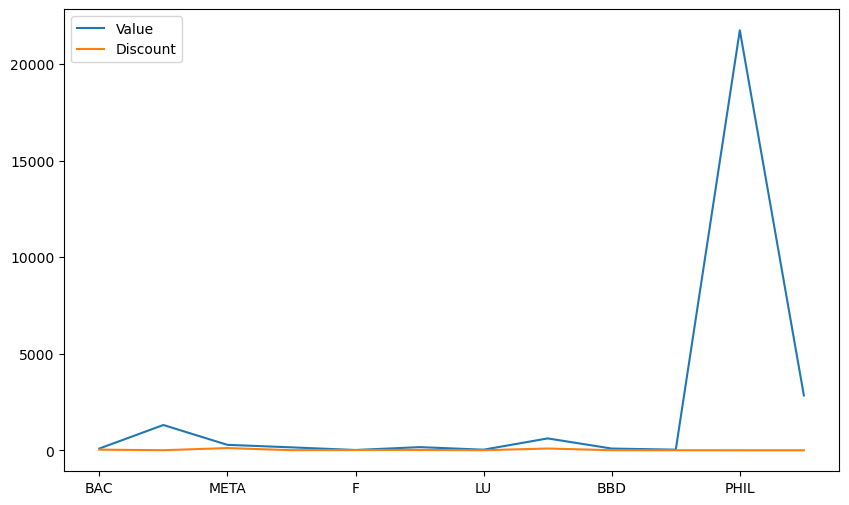

In [45]:
df_Value.plot(figsize=      (10,6))